# Aggregate Methods

These are methods designed to collapse values of a series to a scalar

In [2]:
import sys
import os

import pandas as pd
import numpy as np
import pyarrow as pa
sys.path.append(os.path.abspath(".."))

from extras.utils import load_vehicle_data

## Loading data

In [3]:
df = load_vehicle_data()
# Generating Series
city_mpg = df.city08
highway_mpg = df.highway08

## Aggregations

In [4]:
city_mpg.mean()

18.369045304297103

There are also properties (starting with .is_), which are not called (ending with ()).

In [7]:
city_mpg.is_unique

False

In [8]:
city_mpg.is_monotonic_increasing

False

The quantile method is helpful into diving to specific points in the data. By default it returns the 50% quantile, but it can even receive a list as input

In [9]:
city_mpg.quantile()

17.0

In [10]:
city_mpg.quantile(.9)

24.0

In [11]:
city_mpg.quantile([.1, .5, .9])

0.1    13.0
0.5    17.0
0.9    24.0
Name: city08, dtype: double[pyarrow]

## Count and Mean of an Attribute

In the following case, we filter for values greater than 20 (generates a True/False mask) and then sum the values (True is 1, False is 0)

In [19]:
city_mpg.gt(20)

0        False
1        False
2         True
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: city08, Length: 41144, dtype: bool[pyarrow]

In [18]:
(
    city_mpg
    .gt(20)
    .sum()
)

10272

Now, to show in percentage, we use the mean and the .mul() method, which multiplies the series by the value given

In [24]:
(
    city_mpg
    .gt(20)
    .mul(100)
    .mean()
)

ArrowNotImplementedError: Function 'multiply_checked' has no kernel matching input types (bool, int64)

Apparently there is a difference with pyarrow, but the following solves the issue:

In [25]:
(
    city_mpg
    .gt(20)
    .astype(int)   
    .mul(100)
    .mean()
)

np.float64(24.965973167412017)

## .agg and Aggregation Strings

This is the "Swiss Army Knife" of aggregations!

In [26]:
# Just an example aggregation, in reality in this case it's better to use .mean()
city_mpg.agg("mean")

18.369045304297103

In [27]:
def second_to_last(s):
    return s.iloc[-2]

In [28]:
(
    city_mpg
    .agg([
        "mean",
        np.var,
        max,
        second_to_last
    ])
)

/tmp/ipykernel_13679/1719676601.py:3: FutureWarning: The provided callable <function var at 0x7f462d16dea0> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  .agg([
/tmp/ipykernel_13679/1719676601.py:3: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg([


mean               18.369045
var                62.503036
max               150.000000
second_to_last     18.000000
Name: city08, dtype: float64

### Aggregation strings for .agg

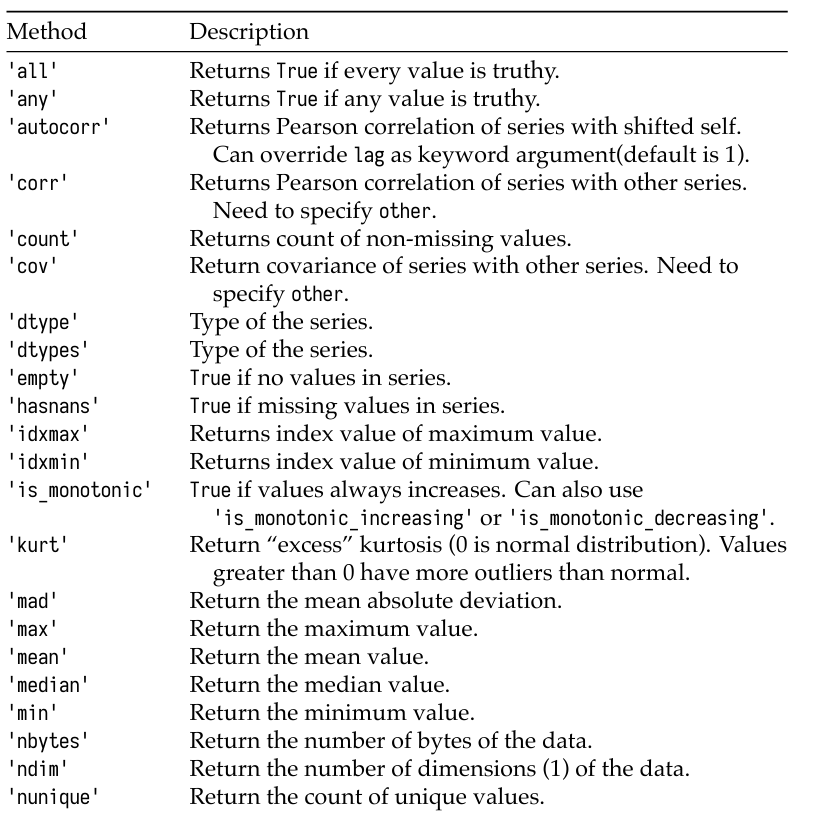
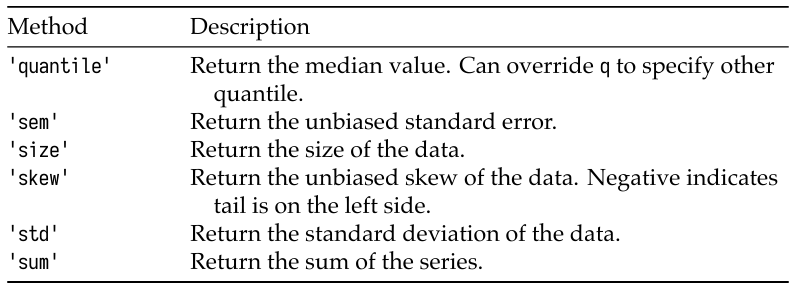

### Agregation methods and properties

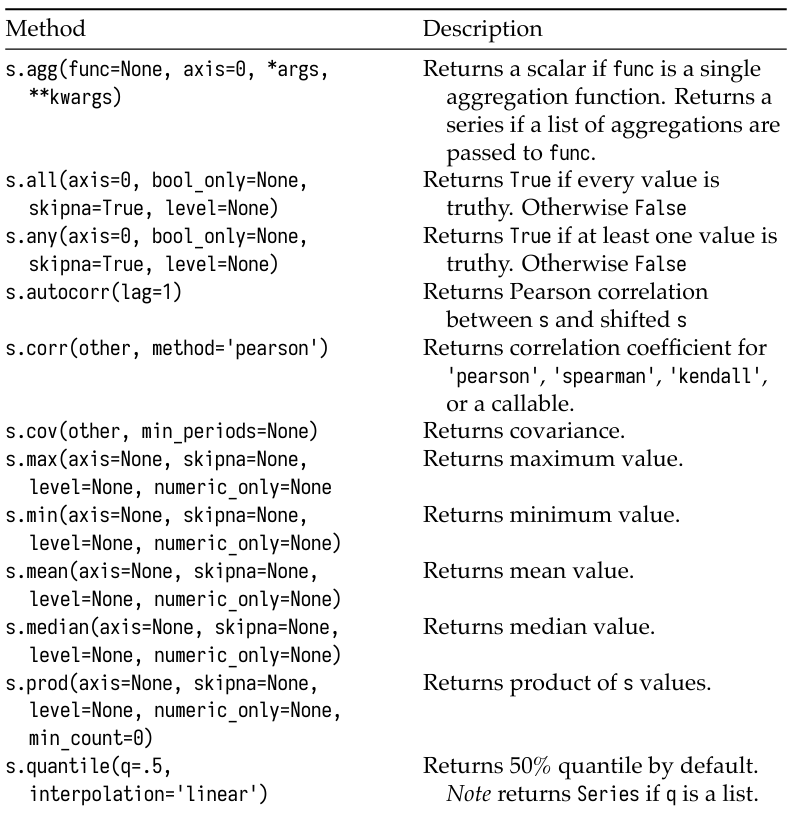
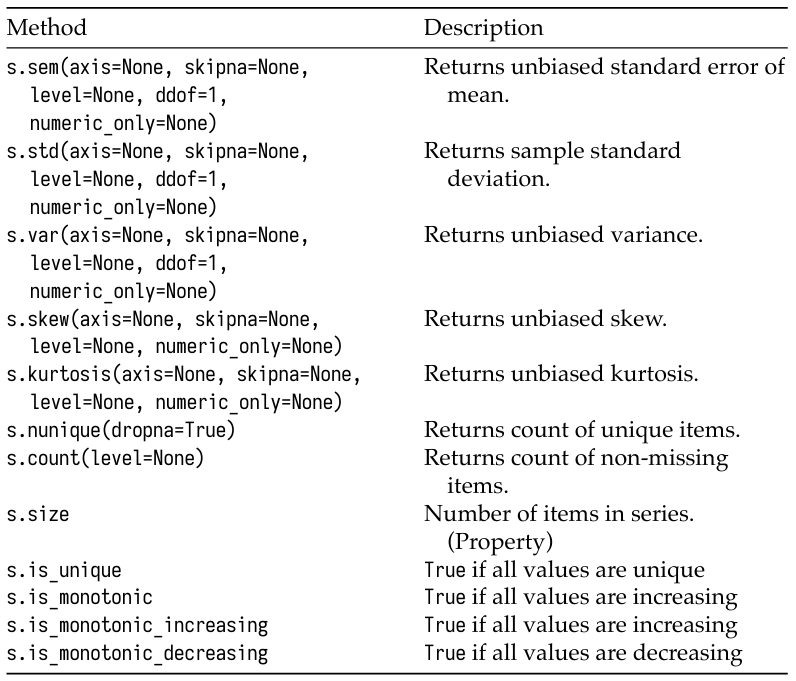

## Excercises

1. Find the count of non-missing values of a series

In [29]:
highway_mpg.count()

np.int64(41144)

2. Find the number of entries of a series.

In [32]:
highway_mpg.size

41144

3. Find the number of unique entries of a series.

In [34]:
highway_mpg.nunique()

92

4. Find the mean value of a series.

In [37]:
highway_mpg.mean()

24.504666537040638

5. Find the maximum value of a series.

In [36]:
highway_mpg.max()

124

6. Use the .agg method to find all of the above.

In [38]:
(
    highway_mpg
    .agg(
        [
            "count",
            "size",
            "nunique",
            "mean",
            "max"
        ]
    )
)

count      41144.000000
size       41144.000000
nunique       92.000000
mean          24.504667
max          124.000000
Name: highway08, dtype: float64